In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import utils

In [2]:
Res_1 = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_7/test_', load_posterior=True)
Res_2 = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_5/test_', load_posterior=True)
Res_3 = utils.RetrievalResults(prefix='../retrieval_outputs/spot_K_B_ret_31/test_', load_posterior=True)

  analysing data from ../retrieval_outputs/no_bands_K_B_ret_7/test_.txt
  analysing data from ../retrieval_outputs/eq_band_K_B_ret_5/test_.txt
  analysing data from ../retrieval_outputs/spot_K_B_ret_31/test_.txt


In [3]:
_, _, Rot_1 = Res_1.get_model_spec()

In [4]:
print(Res_3.posterior[0])
print(np.median(Res_3.posterior[:,[4,6,7,8,9,10,11,12]],axis=0))

[ 1.05626994e-01 -1.75335574e+00  8.81529249e-01  5.09016186e+00
  2.56474872e+01  1.97803309e+01  5.67562672e+00  4.45963933e+01
  5.45793782e-01  2.12848829e-01 -8.69392110e+01  1.89221000e-01
  8.04278841e-01 -6.86015326e+00  1.47648838e+00  1.16467596e+01
 -3.24765862e+00 -4.70684760e+00 -2.90636530e+00 -7.72464902e+00
 -4.86587586e+00 -5.99175881e+00 -5.77436910e+00 -4.36808664e+00
 -7.15133700e+00  1.81679894e-01  3.19871024e-01  3.87908219e-02
  2.01052399e-01  7.05367736e-02  1.36809727e+03  4.76736682e-01
  9.57901253e-01  8.63677036e-01]
[ 25.59606185   5.92655991  43.12930488   0.5341671    0.17213754
 -91.49287298   0.13094942   1.01129837]


In [28]:
# Indices in the posterior of the relevant values
indices_1 = [4]
indices_2 = [4, 6,7,8]
indices_3 = [4, 6,7,8, 9,10,11,12]

labels = [
    r'$v\ \sin i$', #\ (\mathrm{km\ s^{-1}})$', 

    r'$\phi_\mathrm{b,cen}$', #\ (\mathrm{deg})$', 
    r'$\Delta\phi_\mathrm{b}$', #$\ (\mathrm{deg})$', 
    r'$\xi_\mathrm{b}$',

    r'$r_\mathrm{s}$', 
    r'$\theta_\mathrm{s}$', 
    r'$\sigma_\mathrm{s}$', 
    r'$\xi_\mathrm{s}$', 
    ]

bins = 25

def get_envelope_colors(c):

    env_cmap = mpl.colors.LinearSegmentedColormap.from_list('', [c, c])
    env_colors = env_cmap([0.0,0.2,0.4,0.6,0.8])

    # Change the transparency/alpha
    env_colors[:,-1] = np.array([0.0,0.2,0.4,0.6,0.8])
    return env_colors
    
posterior_color_1 = '#5791AC'
posterior_color_1 = '#FFB85C'
envelope_colors_1 = get_envelope_colors(posterior_color_1)

#posterior_color_2 = '#ECA92D'
#posterior_color_2 = '#1E2B51'
posterior_color_2 = '#5791AC'
envelope_colors_2 = get_envelope_colors(posterior_color_2)

#posterior_color_3 = '#650E76'
posterior_color_3 = '#6C1E62'
envelope_colors_3 = get_envelope_colors(posterior_color_3)

cmap = utils.get_cmap()

In [6]:
size_spot  = Res_3.posterior[:,11]
r_spot     = (1-size_spot) * Res_3.posterior[:,9]
theta_spot = Res_3.posterior[:,10]

x_spot = r_spot * np.sin(np.deg2rad(theta_spot))
y_spot = r_spot * np.cos(np.deg2rad(theta_spot))

In [7]:
posterior_1 = Res_1.posterior[:,indices_1[:]]
posterior_2 = Res_2.posterior[:,indices_2[:]]
posterior_3 = Res_3.posterior[:,indices_3[:]]

# Extend the posteriors
posterior_1 = np.concatenate(
    (posterior_1, np.nan*np.ones(
        (posterior_1.shape[0],posterior_3.shape[1]-posterior_1.shape[1]))
    ), axis=-1
)
posterior_2 = np.concatenate(
    (posterior_2, np.nan*np.ones(
        (posterior_2.shape[0],posterior_3.shape[1]-posterior_2.shape[1]))
    ), axis=-1
)

In [8]:
q = 1/2 + 1/2*np.array([-0.997,-0.95,-0.68,0,+0.68,+0.95,+0.997])

param_q1 = np.quantile(posterior_1, q=q, axis=0).T
param_q2 = np.quantile(posterior_2, q=q, axis=0).T
param_q3 = np.quantile(posterior_3, q=q, axis=0).T

dist = 2.5
param_range = []
for i, param_q3_i in enumerate(param_q3):

    low  = param_q3_i[3] + dist*(param_q3_i[2]-param_q3_i[3])
    high = param_q3_i[3] + dist*(param_q3_i[4]-param_q3_i[3])

    low2  = param_q2[i,3] + dist*(param_q2[i,2]-param_q2[i,3])
    high2 = param_q2[i,3] + dist*(param_q2[i,4]-param_q2[i,3])
    if low2 == 0 or high2 == 0:
        pass
    else:
        low = min([low, low2]); high = max([high, high2])

    low1  = param_q1[i,3] + dist*(param_q1[i,2]-param_q1[i,3])
    high1 = param_q1[i,3] + dist*(param_q1[i,4]-param_q1[i,3])
    if low1 == 0 or high1 == 0:
        pass
    else:
        low = min([low, low1]); high = max([high, high1])
    
    param_range.append((low, high))

## Corner + orthographic projection

54.94848034790947 0.478410045322768 -3.013425310314112
49.149972451004615 0.8388938391579615 -0.7904000585433764


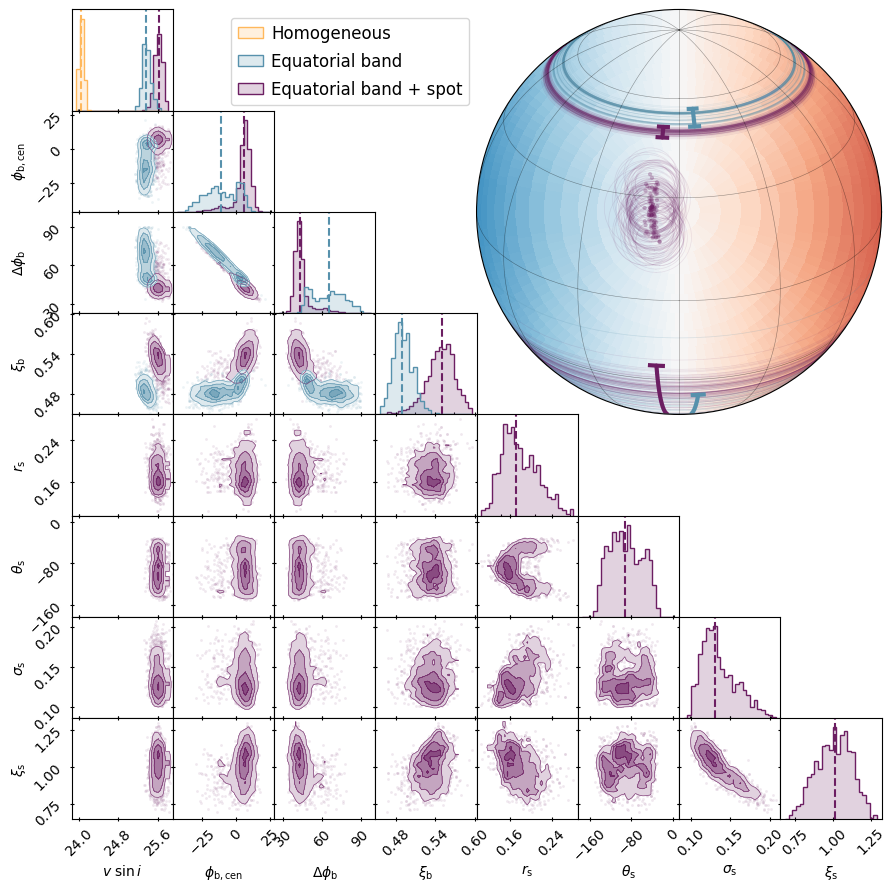

In [36]:
import corner

corner_kwargs = dict(
    labels=labels, 
    #show_titles=True, 
    use_math_text=True, 
    title_fmt='.2f', 
    title_kwargs={'fontsize':10},#, 'loc':'left', 'x':0.05}, 
    labelpad=0.13, 

    range=param_range,  
    bins=bins, 
    max_n_ticks=3, 

    #quantiles=[0.16,0.84,0.50], 
    quantiles=[0.50], 
    linewidths=0.5, 

    #levels=(1-np.exp(-0.5),),
    fill_contours=True, 

    plot_datapoints=True,
    smooth=0.7, 
    #contour_kwargs={'linewidths':0.5}, 
)

fig = plt.figure(figsize=(9,9))

fig = corner.corner(
    posterior_3, 
    fig=fig, 

    color=posterior_color_3,  
    hist_kwargs={
        'edgecolor':posterior_color_3, 
        'facecolor':envelope_colors_3[1], 
        'fill':True
        }, 
    contourf_kwargs={'colors':envelope_colors_3}, 
    contour_kwargs={'linewidths':0.5, 'colors':envelope_colors_3[4]}, 
    **corner_kwargs
    )

fig = corner.corner(
    posterior_2, 
    fig=fig, 
    
    color=posterior_color_2,  
    hist_kwargs={
        'edgecolor':posterior_color_2, 
        'facecolor':envelope_colors_2[1], 
        'fill':True
        }, 
    contourf_kwargs={'colors':envelope_colors_2}, 
    contour_kwargs={'linewidths':0.5, 'colors':envelope_colors_2[4]}, 
    **corner_kwargs
    )

fig = corner.corner(
    posterior_1, 
    fig=fig, 

    color=posterior_color_1,  
    hist_kwargs={
        'edgecolor':posterior_color_1, 
        'facecolor':envelope_colors_1[1], 
        'fill':True
        }, 
    contourf_kwargs={'colors':envelope_colors_1}, 
    contour_kwargs={'linewidths':0.5, 'colors':envelope_colors_1[4]}, 
    **corner_kwargs
    )

ax = np.array(fig.axes)
ax = ax.reshape((int(np.sqrt(len(ax))), int(np.sqrt(len(ax)))))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].tick_params(top=(i!=j), right=(i!=j), direction='inout')


ax_sphere = fig.add_axes((0.52,0.52,0.45,0.45), projection='polar')
sphere = utils.SpherePlot(Rot_1, fig, ax_sphere)
sphere.plot_map(
    attr='v_grid', cmap='RdBu_r', edgecolors='face', lw=1e-6, vmin=-40, vmax=40
    )
sphere.configure_ax(
    xlim=None, sep_spine_lw=None, grid_lw=0.4, grid_alpha=0.4
    )

q = 1/2 + 1/2*np.array([-0.997,-0.95,-0.68,0,+0.68,+0.95,+0.997])
q_to_plot = [1,-2]#,3]

for i, (Res_i, indices_i, color_i) in enumerate(zip([Res_2,Res_3], [indices_2,indices_3], [posterior_color_2,posterior_color_3])):

    random_idx = np.random.randint(0, Res_i.posterior.shape[0], size=100)

    lat_band_center = Res_i.posterior[:,indices_i[1]]
    lat_band_upper  = lat_band_center + Res_i.posterior[:,indices_i[2]]
    lat_band_lower  = lat_band_center - Res_i.posterior[:,indices_i[2]]

    lat_band_center_q = np.nanquantile(lat_band_center, q=q)
    lat_band_upper_q  = np.nanquantile(lat_band_upper, q=q)
    lat_band_lower_q  = np.nanquantile(lat_band_lower, q=q)

    print(lat_band_upper_q[3], lat_band_upper_q[4]-lat_band_upper_q[3], lat_band_upper_q[2]-lat_band_upper_q[3])

    lon = np.deg2rad(
        np.linspace(-180,180,75)[None,:] + \
        np.random.uniform(0,90,len(random_idx))[:,None]
        )
    for j, idx in enumerate(random_idx):
        
        # Plot samples of the upper and lower band-boundary
        kwargs = dict(c=color_i, lw=0.5, alpha=0.1, zorder=1)

        r, phi = sphere._latlon_to_polar(np.deg2rad(lat_band_upper[idx]), lon[j], Rot_1.inc, 0)
        ax_sphere.plot(phi, r, **kwargs)

        r, phi = sphere._latlon_to_polar(np.deg2rad(lat_band_lower[idx]), lon[j], Rot_1.inc, 0)
        ax_sphere.plot(phi, r, **kwargs)

    if i == 0:
        lon = np.deg2rad(7)
    elif i == 1:
        lon = np.deg2rad(-7)

    for lat_to_plot in [lat_band_upper_q, lat_band_lower_q]:

        kwargs = dict(c=color_i, lw=3, alpha=1, solid_capstyle='round', zorder=2)
        
        # Plot errorbars for upper and lower band-boundaries
        r, phi = sphere._latlon_to_polar(
            np.deg2rad(np.linspace(lat_to_plot[q_to_plot[0]],lat_to_plot[q_to_plot[1]],20)), lon, Rot_1.inc, 0
            )
        ax_sphere.plot(phi, r, **kwargs)

        kwargs['solid_capstyle'] = None
        r, phi = sphere._latlon_to_polar(
            np.deg2rad([lat_to_plot[q_to_plot[0]]]*20), lon+np.deg2rad(2)*np.linspace(-1,1,20), Rot_1.inc, 0
            )
        ax_sphere.plot(phi, r, **kwargs)
        r, phi = sphere._latlon_to_polar(
            np.deg2rad([lat_to_plot[q_to_plot[1]]]*20), lon+np.deg2rad(2)*np.linspace(-1,1,20), Rot_1.inc, 0
            )
        ax_sphere.plot(phi, r, **kwargs)

    if i == 0:
        continue

    # Plot the spot centers
    ax_sphere.scatter(
        np.deg2rad(theta_spot[random_idx])-np.pi/2, r_spot[random_idx], #c=color_i, 
        marker='.', alpha=0.3, fc=color_i, ec='none', zorder=2
        )

    # Plot the circular spots
    theta = np.linspace(0,2*np.pi,40)
    x = x_spot[random_idx,None] + size_spot[random_idx,None]*np.sin(theta[None,:])
    y = y_spot[random_idx,None] + size_spot[random_idx,None]*np.cos(theta[None,:])

    phi = np.arctan2(x, y)
    r = x / np.sin(phi)

    ax_sphere.plot(
        phi.T-np.pi/2, r.T, lw=0.5, alpha=0.1, c=color_i, zorder=1
        )
    
'''
#ax_sphere.scatter(
#    np.deg2rad(theta_spot)-np.pi/2, r_spot, c='b', marker='.', alpha=0.05, 
#    )
fig2, ax2 = plt.subplots()
Z, xedges, yedges, _ = ax2.hist2d(
    theta_spot, r_spot, range=[[-180,180], [0,1]], bins=50
)

X = xedges[0:-1] + np.diff(xedges)
Y = yedges[0:-1] + np.diff(yedges)

ax_sphere.contour(np.deg2rad(X)[::-1]+np.pi/2, Y, Z.T, levels=1, colors=posterior_color_3)
plt.close(fig2)
#'''

ax[0,2].fill_betweenx(
    y=2*[np.nan], x1=2*[np.nan], x2=2*[np.nan], fc=envelope_colors_1[1], ec=posterior_color_1, label='Homogeneous'
    )
ax[0,2].fill_betweenx(
    y=2*[np.nan], x1=2*[np.nan], x2=2*[np.nan], fc=envelope_colors_2[1], ec=posterior_color_2, label='Equatorial band'
    )
ax[0,2].fill_betweenx(
    y=2*[np.nan], x1=2*[np.nan], x2=2*[np.nan], fc=envelope_colors_3[1], ec=posterior_color_3, label='Equatorial band + spot'
    )
ax[0,2].legend(
    loc='upper center', bbox_to_anchor=(0.75,1.0), handlelength=1.5, handletextpad=0.5, labelspacing=0.6, fontsize=12
)

l, r = 0.07, 0.97
b, t = 0.07, 0.97
fig.subplots_adjust(left=l, right=r, top=t, bottom=b, wspace=0, hspace=0)
fig.savefig('./plots/rot_broad_corner.pdf')
plt.show()

In [18]:
print(
    np.median(100*posterior_2[:,3]), np.quantile(100*posterior_2[:,3],q=q)[4]-np.median(100*posterior_2[:,3]), 
    np.quantile(100*posterior_2[:,3],q=q)[2]-np.median(100*posterior_2[:,3])
)
print(
    np.median(posterior_2[:,0]), np.quantile(posterior_2[:,0],q=q)[4]-np.median(posterior_2[:,0]), 
    np.quantile(posterior_2[:,0],q=q)[2]-np.median(posterior_2[:,0])
)
print()

print(
    np.median(100*posterior_3[:,3]), np.quantile(100*posterior_3[:,3],q=q)[4]-np.median(100*posterior_3[:,3]), 
    np.quantile(100*posterior_3[:,3],q=q)[2]-np.median(100*posterior_3[:,3])
)
print(
    np.median(posterior_3[:,0]), np.quantile(posterior_3[:,0],q=q)[4]-np.median(posterior_3[:,0]), 
    np.quantile(posterior_3[:,0],q=q)[2]-np.median(posterior_3[:,0])
)

48.42353964446185 1.43478785167094 -1.1153370548666715
25.35411388137812 0.08621526406206215 -0.071993068246055

53.41671038963781 1.520504094727123 -1.8788851001144877
25.596061847864345 0.07678816574853542 -0.07802830400591532
